<a href="https://colab.research.google.com/github/shivam-cse/CS-306-Machine-Learning-Work/blob/main/Lab4/Assignment_4_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Read Data From xls file**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_excel('slr06.xls', index_col=False)
x = dataset.X
y = dataset.Y
# x = x.sort_values()
# y = y.sort_values()
# plt.scatter(x, y)
# plt.plot(x,y)
# plt.show()


*** No CODEPAGE record, no encoding_override: will use 'ascii'


## **Normalization Of Data**

In [ ]:
max = x.max()
x = x/max
x

0     0.870968
1     0.153226
2     0.104839
3     1.000000
4     0.322581
        ...   
58    0.072581
59    0.250000
60    0.112903
61    0.427419
62    0.209677
Name: X, Length: 63, dtype: float64

## **Split the dataset into train(50%), validation (20%), and test(30%).**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_rem, y_train, y_rem = train_test_split(x, y, test_size=0.5)
x_valid, x_test, y_valid,  y_test = train_test_split(x_rem, y_rem,  test_size=0.6)
print(x_valid.shape)
print(y_valid.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

NameError: ignored

In [ ]:
print("Training Data")
print(x_train)
print("Testing Data")
print(x_test)
print("Validation Data")
print(x_valid)

### **Stochastic Gradient Descent Algorithm**

**Some Basics Useful function**

Plot graph

In [ ]:
def plot_regression_line(x, w0, w1):
  x_regression = x.values
  y_regression = []
  for xth in x:
    y = w1*xth + w0
    y_regression.append(y)
  plt.plot(x_regression, y_regression)
  # plt.pause(1)  #pause for 1 second before plotting next line
  # return y_regression

Calculate MSE

In [ ]:
from sklearn.metrics import mean_squared_error
def calculate_mse_1(y_actual, y_pred):
  mse = mean_squared_error(y_actual, y_pred)
  return mse
  
def calculate_mse_2(x_train, y_train, w0, w1):
  jw = 0
  for x, y_actual in zip(x_train, y_train):
      y_pred = w1*x + w0
      jw = jw + ((y_pred - y_actual)*(y_pred - y_actual));
  
  jw  = jw/(x_train.size)
  return jw

### **Termination Done By  Number Of epochs**

In [ ]:

# //Stochastic Gradient Descent
def gradient_descent(x_train, y_train, w0, w1, lr):
  
  jw = 0
  for x, y_actual in zip(x_train, y_train):
    y_pred = w1*x + w0
    jw = jw + ((y_pred - y_actual)*(y_pred - y_actual));
    
    w0 = w0 + (lr)*(y_actual - y_pred)
    w1 = w1 + (lr)*(y_actual- y_pred)*x

  jw = jw/(2*x_train.size)

  return w0, w1 , jw
  

  
plt.plot(x_train,y_train,'o')
plt.title("Implementing Gradient Descent")
plt.xlabel("X_train")
plt.ylabel("Y_train")
w0 = 0; w1 = 0; lr = 0.3
print(w0, " ", w1, " ", 0)
for i in range(100):
  w0, w1, jw = gradient_descent(x_train, y_train, w0, w1, lr)
  print(w0, " ", w1, " ", jw)
  plot_regression_line(x, w0, w1)
  


In [ ]:
# For Training Test 
alpha = [0.1, 0.001, 0.0001, 0.5, 1]
w0 = 0; w1 = 0; lr = 0.00001
rho = 0.0001
for a in alpha:
  w0 = 0; w1 = 0
  for i in range(100):
    w0, w1, jw = gradient_descent(x_train, y_train, w0, w1, a)
  print("Final : w0, w1, MSE : ", w0 , w1, jw)



Final : w0, w1, MSE :  22.27829518046308 414.4441077213282 798.2635555392063
Final : w0, w1, MSE :  85.8782573512253 38.92562408966398 2292.7800839038186
Final : w0, w1, MSE :  25.23877444991538 6.855015258619182 4919.372341591041
Final : w0, w1, MSE :  21.897552151185668 396.2295524109053 843.1964067480412
Final : w0, w1, MSE :  3.7401685858608076 434.3144617743683 1116.6463839215967


In [ ]:
# For Validation set 
alpha = [0.1, 0.001, 0.0001, 0.5, 1]
w0 = 0; w1 = 0; lr = 0.00001
rho = 0.0001
for a in alpha:
  w0 = 0; w1 = 0
  for i in range(100):
    w0, w1, jw = gradient_descent(x_valid, y_valid, w0, w1, a)
  print("Final : w0, w1, MSE : ", w0 , w1, jw)



Final : w0, w1, MSE :  39.03120827691271 378.08726686094104 497.9773534381445
Final : w0, w1, MSE :  65.92678772893667 16.68668556205708 2026.9817210650692
Final : w0, w1, MSE :  10.834249273519864 2.346001206068854 5318.258691050726
Final : w0, w1, MSE :  19.34832355843538 478.94585909604376 497.34301792798084
Final : w0, w1, MSE :  32.859104142682334 353.7073620119442 616.0899635041616


In [ ]:
# For Testing set 
alpha = [0.1, 0.001, 0.0001, 0.5, 1]
w0 = 0; w1 = 0; lr = 0.00001
rho = 0.0001
for a in alpha:
  w0 = 0; w1 = 0
  for i in range(100):
    w0, w1, jw = gradient_descent(x_test, y_test, w0, w1, a)
  print("Final : w0, w1, MSE : ", w0 , w1, jw)



Final : w0, w1, MSE :  8.373643799558826 414.6707716556149 518.3839393706296
Final : w0, w1, MSE :  79.88634344655448 72.41181287986197 4788.693838808535
Final : w0, w1, MSE :  18.623704703785567 10.111178241806998 9898.431656691004
Final : w0, w1, MSE :  8.990839997878847 419.77136212366383 752.286893345608
Final : w0, w1, MSE :  21.879692376050286 458.3539532538933 1245.038425264101


## **Termination Done By rho**

0   0   0


KeyboardInterrupt: ignored

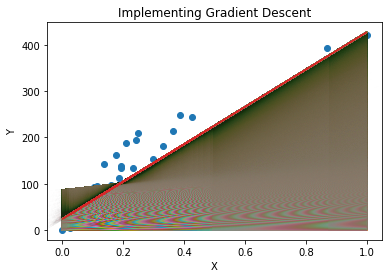

In [ ]:
def gradient_descent_rho(x_train, y_train, w0, w1, lr, rho):
  jw_prev = calculate_mse_2(x_train, y_train, w0, w1)
  epochs = 0
  while True:
    jw = 0
    plot_regression_line(x_train, w0, w1)
    for x, y_actual in zip(x_train, y_train):
      y_pred = w1*x + w0
      jw = jw + ((y_pred - y_actual)*(y_pred - y_actual));
    
      w0 = w0 + (lr)*(y_actual - y_pred)
      w1 = w1 + (lr)*(y_actual- y_pred)*x

    jw = jw/(2*x_train.size)
    # print("epochs = ", epochs, "Jw = ", jw)
    if(abs(jw - jw_prev) < rho):
      break
    else:
      jw_prev = jw
      epochs += 1
      # plot_regression_line(x, w0, w1)
    
  return w0, w1 , jw



plt.plot(x,y,'o')
plt.title("Implementing Gradient Descent")
plt.xlabel("X")
plt.ylabel("Y")

w0 = 0; w1 = 0; lr = 0.00001
# y_pred = plot_regression_line(x, w0, w1)
# print("mse1 = ", calculate_mse_1(y, y_pred))
# print("mse2 = ", claculate_mse_2(x, y, w0, w1))

print(w0, " ", w1, " ", 0)
# for i in range(100):
w0, w1, jw = gradient_descent_rho(x, y, w0, w1, lr, 0.0001)
print(w0, " ", w1, " ", jw)
plot_regression_line(x, w0, w1)



## Print the train, validation, and test MSE by considering the learning rate 0.1, 0.001, 0.0001, 0.5, and 1.

In [ ]:
print(x_train, " ", y_train)

In [ ]:
print(x_valid, " ", y_valid)

In [ ]:
print(x_test, " ", y_test)

In [ ]:
alpha = [0.1, 0.001, 0.0001, 0.5, 1]
w0 = 0; w1 = 0; lr = 0.00001
rho = 0.0001
for a in alpha:
  w0 = 0; w1 = 0
  w0, w1, jw = gradient_descent_rho(x_train, y_train, w0, w1, a, rho)
  print("Final : w0, w1, MSE : ", w0 , w1, jw)


NameError: ignored

# **Batch Gradient Descent Algorithm**

In [ ]:

# //Stochastic Gradient Descent
def gradient_descent_batch(x_train, y_train, w0, w1, lr):
  jw = 0
  h = list()
  for x, y_actual in zip(x_train, y_train): #step 2
    val = w0 + w1*x
    val = val - y_actual
    h.append(val)
    jw += pow(val, 2)
  
  jw = jw/(2*len(x_train))  #step 3
  sum1= 0    
  for s in h:      #Step 4 Updation
    sum1 += s
  w0 = w0 - ((lr)*sum1)/len(x_train)

  sum1 = 0
  for s, x in zip(h, x_train):
    sum1 += s*x     
  w1 = w1 - (lr*sum1)/len(x_train) 

  return w0, w1 , jw
  

w0 = 0; w1 = 0; lr = 0.3
print(w0, " ", w1, " ", 0)

for i in range(100):
  w0, w1, jw = gradient_descent_batch(x_train, y_train, w0, w1, lr)
  print(w0, " ", w1, " ", jw)
  plot_regression_line(x, w0, w1)
  


0   0   0


NameError: ignored

In [ ]:
alpha = [0.1, 0.001, 0.0001, 0.5, 1]

for a in alpha:
  print("Alpha = ", a)
  w0 = 0; w1 = 0
  for i in range(1000):
    w0, w1, jw = gradient_descent_batch(x_train, y_train, w0, w1, a)
  print(w0, " ", w1, " ", jw)
  # plot_regression_line(x, w0, w1)

## **Plot graph for training MSE vs. epoch by considering the learning rate 0.3.**

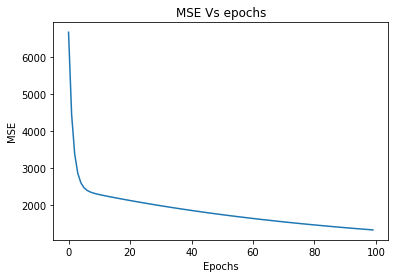

In [ ]:
import matplotlib.pyplot as plt

mse_values = list()
epochs_values = list()
lr = 0.3
w0 = 5; w1 = 0
for i in range(100):
  w0, w1, jw = gradient_descent_batch(x_train, y_train, w0, w1, lr)
  mse_values.append(jw)
  epochs_values.append(i)
  # print(jw)

plt.plot(epochs_values, mse_values)
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title("MSE Vs epochs")
plt.show()


In [ ]:
from sklearn import datasets
data = datasets.load_boston(return_X_y=False)
data = data['data']

data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd 
from sklearn.datasets import load_boston
boston_dataset = load_boston()

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
 boston_dataset.target